# Regression_NNx_x_y_y_Fz

In [35]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dense, GRU, Embedding, Dropout
from keras.optimizers import RMSprop
from keras import activations
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
#from keras.initializers import RandomUniform
#from keras.initializers import Initializer

import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
sns.set_style("whitegrid")
current_palette = sns.color_palette('colorblind')

In [36]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

In [37]:
features = 20 #entspricht der Anzahl der Sensoren
timesteps = 22 # *0.05s --> definiert die Zeitspanne in der zeitliche Abhängigkeiten 
               #     vom Netzwerk erlernt werden können
batchsize = 128
LSTM_size = 64 #Anzahl der LSTM-Zellen
Dense_size = 32
epochen = 5
name = 'NN2_3_1_2_Fz'

In [38]:
## Um Vorhandenes, bereits trainiertes Model zu laden auskommentieren
from keras.models import load_model
model = load_model('model/'+name)

#### Aufbau Model

In [14]:
model = Sequential()
model.add(LSTM(LSTM_size, dropout=0.3, recurrent_dropout=0.3 ,return_sequences=True,
               batch_input_shape=(None, timesteps, features)))
#model.add(LSTM(LSTM_size, dropout=0.3, recurrent_dropout=0.3 ,return_sequences=True))
model.add(LSTM(LSTM_size, dropout=0.3, recurrent_dropout=0.3 ,return_sequences=False))
#model.add(Dense(Dense_size))
model.add(Dense(Dense_size))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

#### Trainingsdaten laden

In [39]:
x_train = np.load('Regression_Daten/x_train.npy').astype('float32')
x_val = np.load('Regression_Daten/x_val.npy').astype('float32')
x_test = np.load('Regression_Daten/x_test.npy').astype('float32')

y_train = np.load('Regression_Daten/y_Fz_train2.npy').astype('float32')
y_val = np.load('Regression_Daten/y_Fz_val2.npy').astype('float32')
y_test = np.load('Regression_Daten/y_Fz_test2.npy').astype('float32')

#### Model trainieren

In [8]:
model.fit(x_train, y_train,
          batch_size=batchsize , epochs=epochen, validation_data=(x_val, y_val));

Train on 11392 samples, validate on 2944 samples
Epoch 1/5
11392/11392 [==============================] - 3s 304us/step - loss: 12128.4908 - val_loss: 20613.9274
Epoch 2/5
11392/11392 [==============================] - 3s 281us/step - loss: 11155.5536 - val_loss: 18413.8222
Epoch 3/5
11392/11392 [==============================] - 3s 283us/step - loss: 10335.3378 - val_loss: 21754.7920
Epoch 4/5
11392/11392 [==============================] - 3s 274us/step - loss: 9752.0385 - val_loss: 20195.7454
Epoch 5/5
11392/11392 [==============================] - 3s 296us/step - loss: 9395.3943 - val_loss: 19886.8801


In [9]:
history_dict = model.history.history;

#### Analysiere Trainingsergebnisse

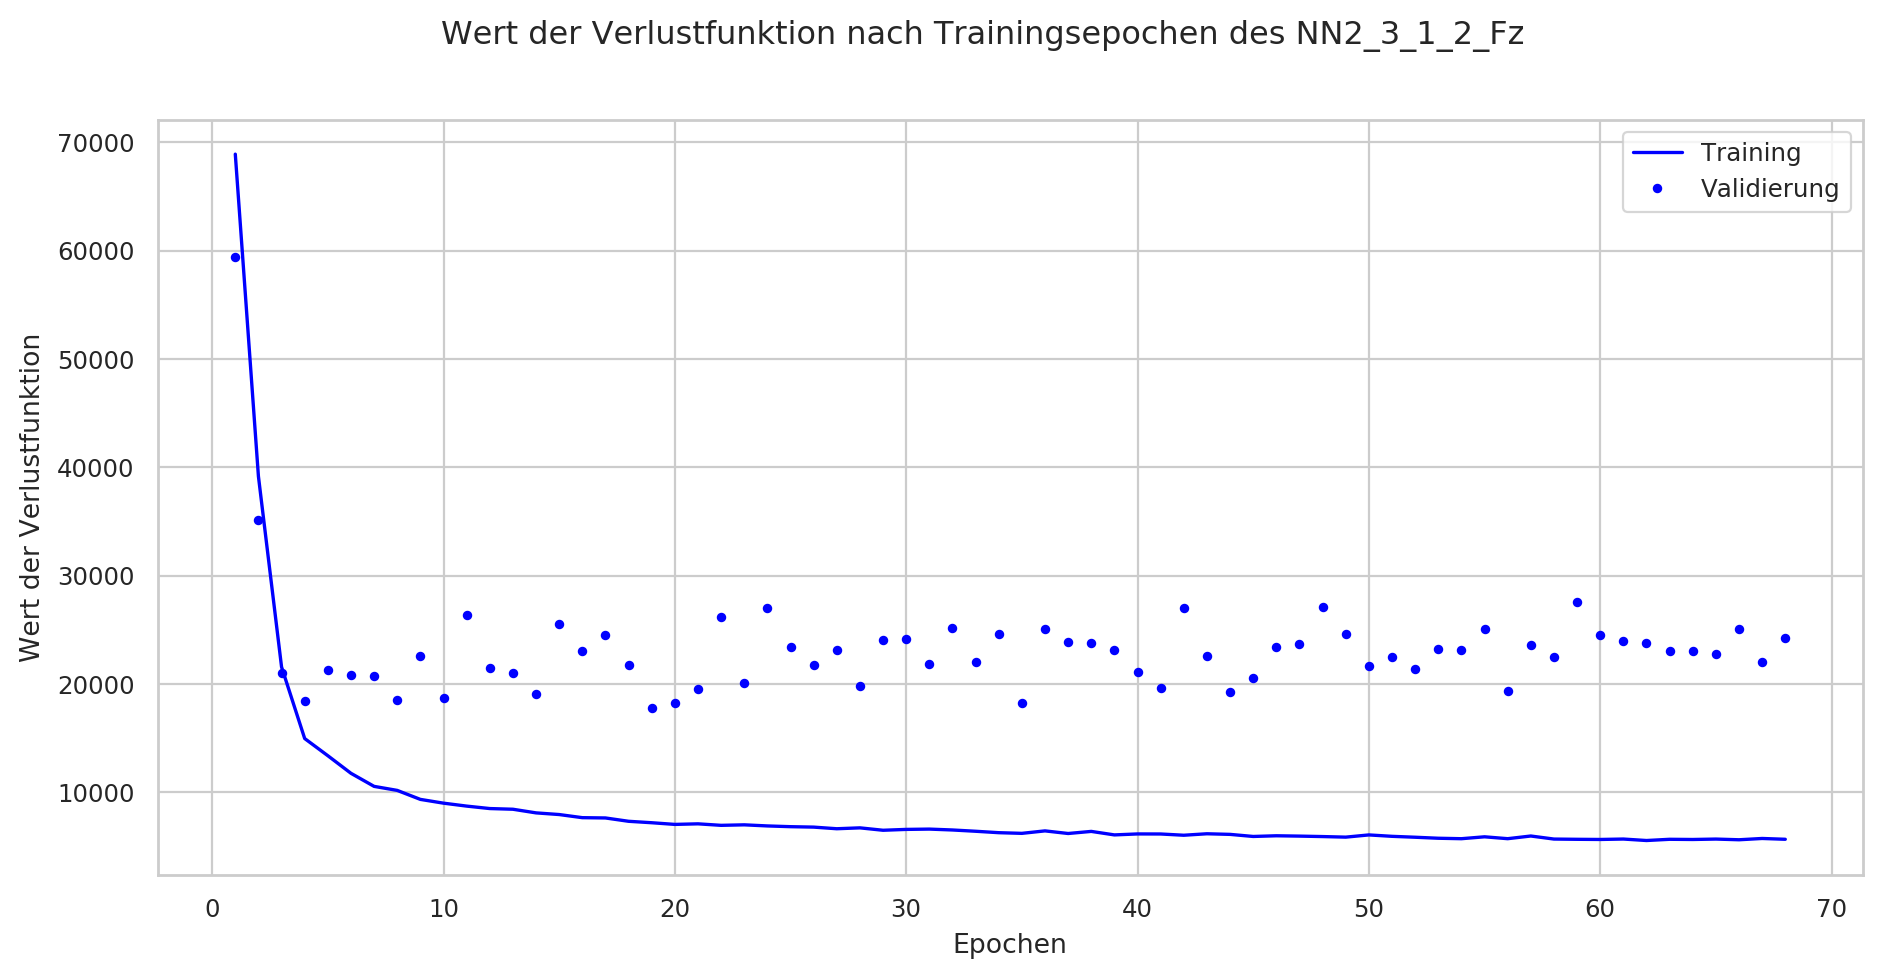

In [8]:
sns.set_context("paper")

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(num=None, figsize=(11,5), dpi=200, facecolor='w', edgecolor='k')
#f, (ax1,ax2) = plt.subplots(1,2, figsize=(11, 5), dpi=100, facecolor='w', edgecolor='k')
#f.suptitle('Trainingsverlauf '+name)
plt.plot(epochs, loss_values, 'b',label='Training')
plt.plot(epochs, val_loss_values, 'b.',label='Validierung')
plt.suptitle('Wert der Verlustfunktion nach Trainingsepochen des '+name)
plt.xlabel('Epochen')
plt.ylabel('Wert der Verlustfunktion')

plt.legend()#bbox_to_anchor=(0.9, 0., 0.5, 0.5), borderaxespad=1)
plt.show()

#### Anwendung des trainierten Models auf 'unbekannte' Trainingsdaten

In [41]:
tic()
predictions = model.predict(x_test,batch_size=batchsize)
toc()
y_real = y_test

Elapsed time: 0.262432 seconds.



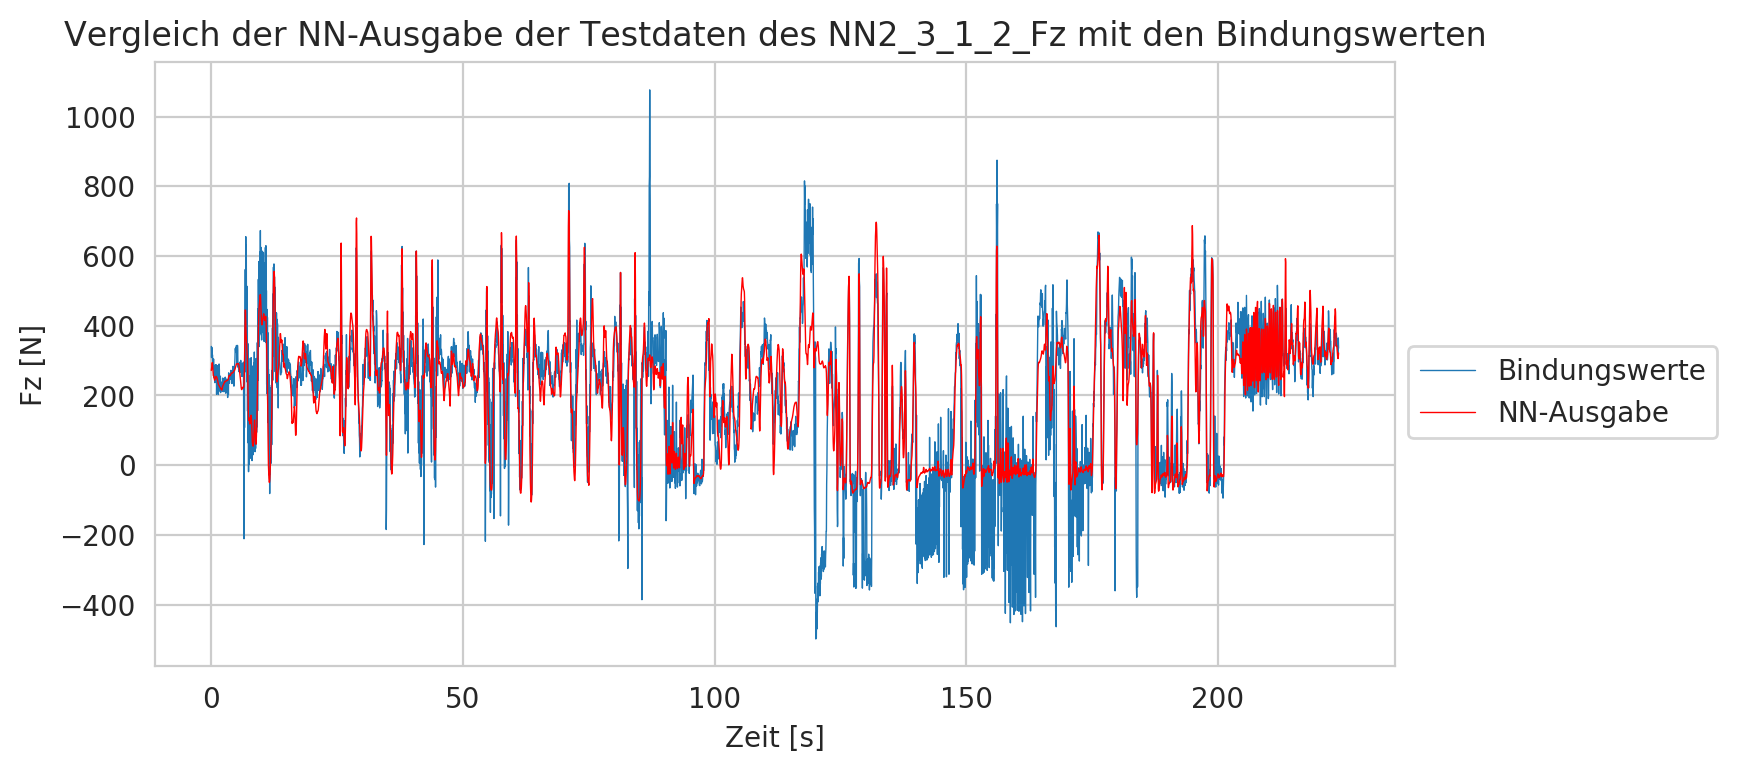

In [42]:
plt.figure(num=None, figsize=(8,4), dpi=200, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), 
         y_real, label='Bindungswerte', linewidth=0.5)
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), 
         predictions,'r', label='NN-Ausgabe', linewidth=0.5)
plt.title('Vergleich der NN-Ausgabe der Testdaten des ' +name +' mit den Bindungswerten')
plt.xlabel('Zeit [s]')
plt.ylabel('Fz [N]')
plt.legend(bbox_to_anchor=(0.61, 0.15, 0.65, 0.38), borderaxespad=0)
plt.show()

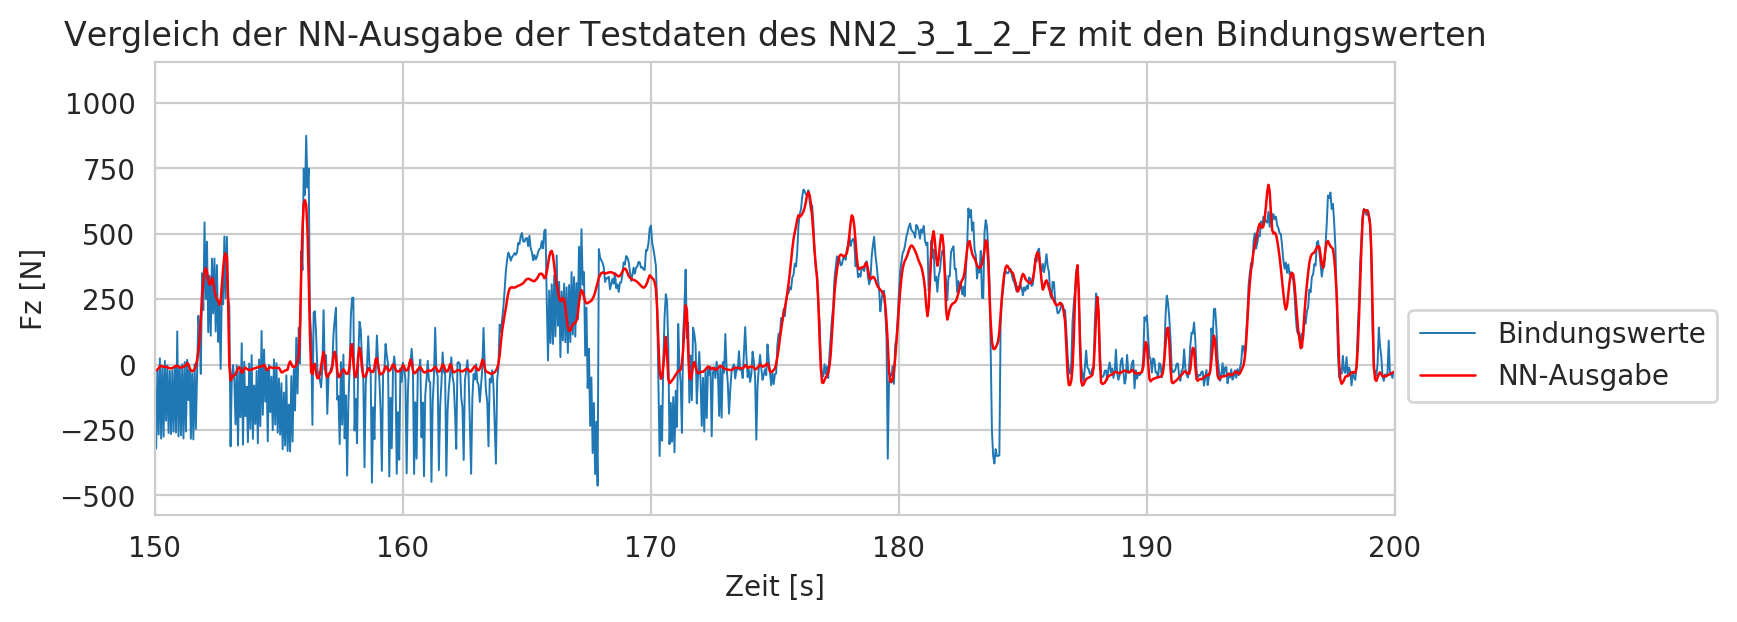

In [43]:
plt.figure(num=None, figsize=(8,3), dpi=200, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), y_real, 
         label='Bindungswerte', linewidth=0.7)
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,
         'r', label='NN-Ausgabe', linewidth=0.9)
plt.title('Vergleich der NN-Ausgabe der Testdaten des ' +name +' mit den Bindungswerten')
plt.xlabel('Zeit [s]')
plt.ylabel('Fz [N]')
plt.legend(bbox_to_anchor=(0.61, 0.25, 0.65, 0.45), borderaxespad=0)
plt.xlim(left=150, right=200)
plt.show()

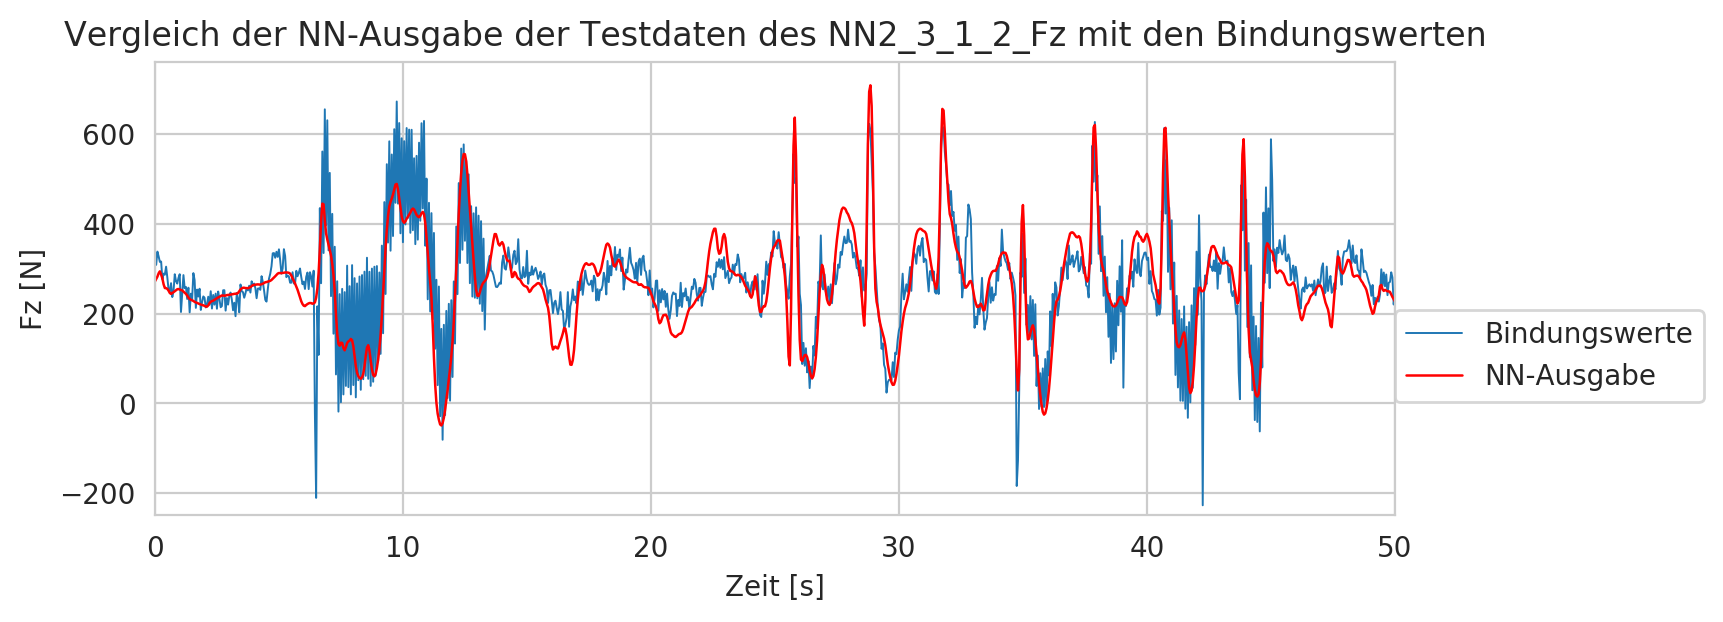

In [44]:
plt.figure(num=None, figsize=(8,3), dpi=200, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), y_real, 
         label='Bindungswerte', linewidth=0.7)
plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,
         'r', label='NN-Ausgabe', linewidth=0.9)
plt.title('Vergleich der NN-Ausgabe der Testdaten des ' +name +' mit den Bindungswerten')
plt.xlabel('Zeit [s]')
plt.ylabel('Fz [N]')
plt.legend(bbox_to_anchor=(1, 0.25, 0.68, 0.45), borderaxespad=0)
plt.xlim(left=0, right=50)
plt.ylim(bottom=-250, top=760)
plt.show()

## Zusammenfassung

In [45]:
# Nach welcher Epoche sollte das Training optimalerweise abgeschlossen werden?
# Vorgehen: einmal Netzwerk berechnen in 25 Epochen -> optimale Epochenanzahl anhand 
#           'min_index_val_loss+1' ablesen und als Parameter oben angeben,
#           danach Netzwerk neu berechnen lassen.
min_index_val_loss, min_value_val_loss = min(enumerate(history_dict['val_loss']), 
                                             key=operator.itemgetter(1))
#max_index_val_acc, max_value_val_acc = max(enumerate(history_dict['val_acc']), 
#                                             key=operator.itemgetter(1))
print('Ergebnisse der Validierungsdaten:')
print('  opimale Epochenanzahl:                 '+str(min_index_val_loss+1))
print('  minimaler Verlust:                     '+str(min_value_val_loss)+'\n')

print('Ergebnisse der Trainingdaten zur optimalen Epochenzahl:')
print('  Verlust:                               '+str(history_dict['loss']
                                                      [min_index_val_loss]))

NameError: name 'history_dict' is not defined

In [46]:
# Beurteilung der Testdaten: Vergleich von 'predictions' mit y_real
#                  - Kreuzkorrelation
#                  - Euklidsche Distanz
#   Kreuzkorrelation
print('Vergleich der Vorhersagewerte mit den Bindungswerten:')
print('  Korrelationskoeffizient:               '+ str(np.corrcoef(np.transpose(predictions),np.transpose(y_real))[0,1]))

#   Euklidsche Distanz
summe=0
for i in range(len(predictions)):
    summe+=math.pow(predictions[i]-y_real[i],2)
print('  Euklidsche Distanz:                    '+ str(math.sqrt(summe)))

#print(model.summary())

Vergleich der Vorhersagewerte mit den Bindungswerten:
  Korrelationskoeffizient:               0.8159477776267423
  Euklidsche Distanz:                    8025.28729397375


In [47]:
## Um trainiertes Model zu sicher auskommentieren
#model.save('model/'+name) 

In [48]:
#import os; os.system('say "Berechnung beendet   '+name+'"'); print('\a\a\a') #gibt unter MacOS Soundsignal, wenn berechnung beendet ist

## Bland-Altmann-Diagramm

In [49]:
subtr = predictions - y_real 
mean_bland = subtr.mean(axis=0)
std_bland = subtr.std(axis=0)

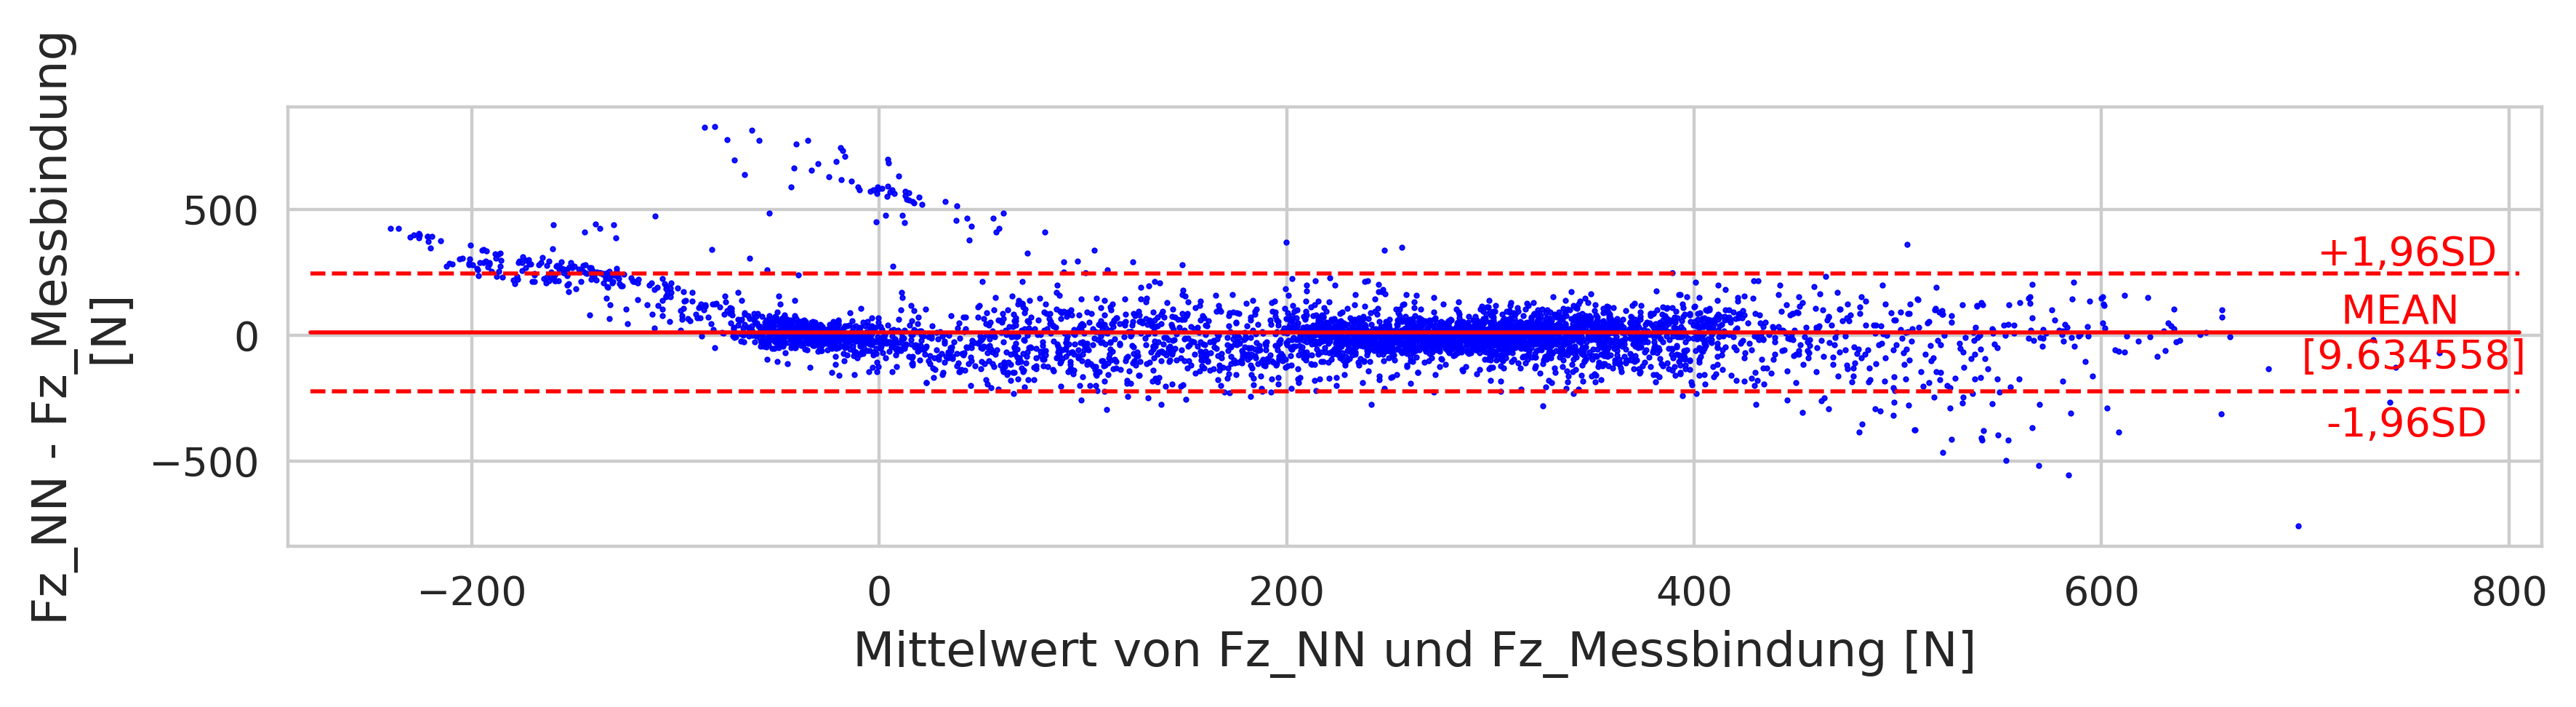

In [69]:
plt.figure(num=None, figsize=(10,2), dpi=400, facecolor='w', edgecolor='k')
plt.plot((y_real+predictions)/2, subtr, 'b.', markersize=1, label='Bindungswerte', linewidth=0.3)
#plt.plot(np.linspace(0,len(predictions)*0.05-0.05,len(predictions)), predictions,'r', label='NN-Ausgabe', linewidth=0.9)

#plt.title('Bland-Altmann-Diagramm zum Vergleich des ' +name +' mit den Messbindungswerten', size=16)
plt.xlabel('Mittelwert von Fz_NN und Fz_Messbindung [N]', size=12)
plt.ylabel('Fz_NN - Fz_Messbindung\n[N]', size=12)
plt.axhline(y=mean_bland, xmin=0.01, xmax=0.99, color='r',linewidth=1)
plt.axhline(y=mean_bland-1.96*std_bland, xmin=0.01, xmax=0.99, color='r', linestyle='--',linewidth=1)
plt.axhline(y=mean_bland+1.96*std_bland, xmin=0.01, xmax=0.99, color='r', linestyle='--',linewidth=1)
plt.text(750, 170, 'MEAN \n '+str(mean_bland), horizontalalignment='center',
         verticalalignment='top', multialignment='center', color='r')
plt.text(750, 400, '+1,96SD', horizontalalignment='center',
         verticalalignment='top', multialignment='center', color='r')
plt.text(750, -280, '-1,96SD', horizontalalignment='center',
         verticalalignment='top', multialignment='center', color='r')

#plt.legend(bbox_to_anchor=(0.61, 0.25, 0.58, 0.45), borderaxespad=0)
#plt.xlim(left=0, right=50)
#plt.xlim(left=150, right=200)
#plt.ylim(bottom=-10, top=10)
plt.show()

In [52]:
#MSE:
print('  MSE:               '+ str(((subtr*subtr).sum(axis=0)/len(subtr))**(1/2)))#/(max(y_real)-min(y_real))

  MSE:               [119.900665]
